In [ ]:
import pandas as pd

# df = pd.read_csv('../data/sales.csv')
df = pd.read_csv('sales.csv')
df.dropna(subset=['price'], inplace=True)

In [ ]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

# 1. Data Transformation

<font color='red'>Assignment:</font> Build a DataFrame named **train** which contains numerical values of **price** and **cost** in **train_raw**.

In [ ]:
train_raw.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
4,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011


In [ ]:
train = pd.DataFrame(columns = ['price', 'cost'])

In [ ]:
train['price'] = train_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))

In [ ]:
train['cost'] = train_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))

In [ ]:
train.head()

,price,cost
0,300492.0,333000.0
1,430570.0,NaN
2,213070.0,270000.0
3,122659.0,97000.0
4,60320.0,59000.0


**Example:** Generate features and target. This is not the only method, but it is highly recommended.

In [ ]:
features = list(train.columns)
target = "price"
features.remove(target)

X_train = train[features]
y_train = train[target]

**Example:** Imputing missing values in **X_train** using the column means.

In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
X_train.head()

,cost
0,333000.000000
1,166184.183143
2,270000.000000
3,97000.000000
4,59000.000000


<font color='red'>Assignment:</font> Get **X_test** and **y_test**, and impute missing values in **X_test** with means of **X_train**.  

In [ ]:
test = pd.DataFrame(columns = ['price', 'cost'])
test['price'] = test_raw['price'].map(lambda x: x if type(x) is float else float(x.strip('$').replace(',', '')))
test['cost'] = test_raw['cost'].map(lambda x: x if type(x) is float else 1000*float(x.strip('$').strip('k')))

In [ ]:
X_test = test[features]
y_test = test[target]

In [ ]:
X_test = X_test.fillna(X_train.mean())

In [ ]:
X_test.head()

,cost
0,166184.183143
1,160000.000000
2,160000.000000
3,166184.183143
4,18000.000000


<font color='red'>Question:</font> Why do we use means of **X_train** rather than those of **X_test**?

### Because the model is built based on NaN <- mean(X_train) for X_train, if for X_test, NaN <- mean(X_test), then you used a different base line.
### We can also consider other fillna options, such as interpolation.

##### data leakage: any statistics used to treat test data must come from train data

# 2. Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Example:** Initialize model

In [ ]:
model = LinearRegression()

**Example:** Fit model

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

**Example:** Get prediction

In [ ]:
y_train_pred = model.predict(X_train)

<font color='red'>Assignment:</font> Calculate **train loss**: **MAE**, **MSE**, and **R2 score**.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.15e+05
train MSE: 2.96e+10
train R2: 0.306


<font color='red'>Assignment:</font> Visualize the difference between prediction and ground truth.

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

Text(0, 0.5, 'y_train_pred')

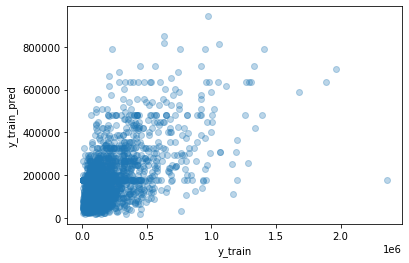

In [ ]:
plt.scatter(y_train, y_train_pred, alpha = 0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

<font color='red'>Question:</font> What are the coefficient and intercept for this model?

In [ ]:
model.coef_

array([0.98206553])

In [ ]:
model.intercept_

14657.539917452465

**Example:** Visualize the relationship between **price** and **cost**.

In [ ]:
import numpy as np

def plot_cost_price(cost, price, model):
    plt.scatter(cost, price, alpha=0.3)
    x = np.linspace(0, 1e6)
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color='r')
    plt.xlabel('cost')
    plt.ylabel('price')
    plt.xlim([0,1e6])
    plt.ylim([0,2e6])
    plt.show()

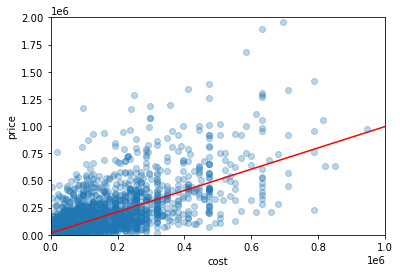

In [ ]:
plot_cost_price(train.cost, train.price, model)

<font color='red'>Assignment:</font> Calculate the **test loss**; visualize the comparision between prediction and ground truth and the relationship between **cost** and **price** with **test data**.

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.44e+05
test MSE: 5.62e+10
test R2: 0.348


Text(0, 0.5, 'y_test_pred')

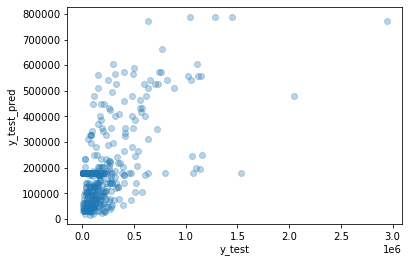

In [ ]:
plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

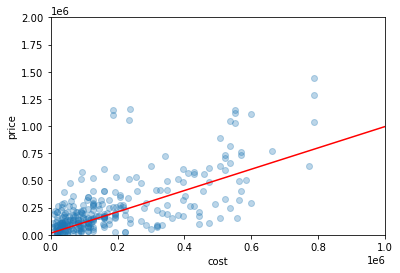

In [ ]:
plot_cost_price(test.cost, test.price, model)

# 3. Polynomial Model

## 3.1 Polynomial Features

**Example:** Generate polynomial features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=3)

In [ ]:
pf.fit_transform(X_train)

array([[1.00000000e+00, 3.33000000e+05, 1.10889000e+11, 3.69260370e+16],
       [1.00000000e+00, 1.66184183e+05, 2.76171827e+10, 4.58953895e+15],
       [1.00000000e+00, 2.70000000e+05, 7.29000000e+10, 1.96830000e+16],
       ...,
       [1.00000000e+00, 1.66184183e+05, 2.76171827e+10, 4.58953895e+15],
       [1.00000000e+00, 4.40000000e+04, 1.93600000e+09, 8.51840000e+13],
       [1.00000000e+00, 1.28000000e+05, 1.63840000e+10, 2.09715200e+15]])

In [ ]:
pf.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3']

In [ ]:
pd.DataFrame(pf.transform(X_train), 
             columns=pf.get_feature_names()).head()

,1,x0,x0^2,x0^3
0,1.0,333000.000000,1.108890e+11,3.692604e+16
1,1.0,166184.183143,2.761718e+10,4.589539e+15
2,1.0,270000.000000,7.290000e+10,1.968300e+16
3,1.0,97000.000000,9.409000e+09,9.126730e+14
4,1.0,59000.000000,3.481000e+09,2.053790e+14


<font color='red'>Question:</font> What is each column in above dataframe?

### PolynomialFeatures generates a new feature matrix consisting of all polynomial combinations of the features with the given degree. in this case, the first column is train.cost to the power of 0, which is 1. Second column is train.cost. Third and forth columns are train.cost to the power of 2 and 3, respectively.

## 3.2 Pipeline

:**Example:** Use **pipeline** to wrap up polynomial features and model.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
steps = [('poly', PolynomialFeatures(degree=2)),
         ('lr', LinearRegression())]
model_p = Pipeline(steps)

**Example:** use pipeline as model.

In [ ]:
model_p.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [ ]:
y_train_pred_p = model_p.predict(X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://hub.packtpub.com/automl-build-machine-learning-pipeline-tutorial/

<font color='red'>Assignment:</font> Calculate regression metrics; visualize train and test lost; visualize relationship between **cost** and **price**.

will interview questions be like these? or it will be more clear? e.g. seperate tasks . train metrcis, train loss, train cost& price. Then test metrics, test loss, test cost& price??

In [ ]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred_p)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred_p)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred_p)))

train MAE: 1.11e+05
train MSE: 2.88e+10
train R2: 0.323


Text(0, 0.5, 'y_train_pred')

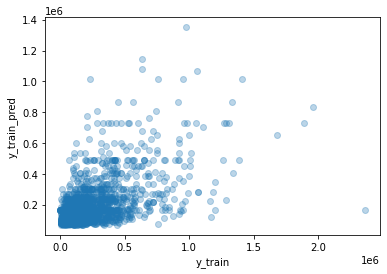

In [ ]:
plt.scatter(y_train, y_train_pred_p, alpha = 0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

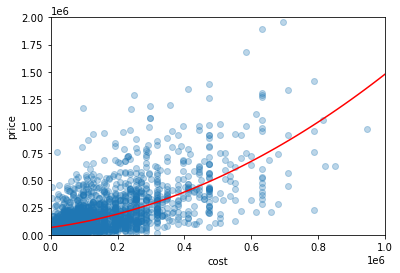

In [ ]:
plot_cost_price(train.cost, train.price, model_p)

In [ ]:
y_test_pred_p = model_p.predict(X_test)

In [ ]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred_p)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred_p)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred_p)))

test MAE: 1.36e+05
test MSE: 5.20e+10
test R2: 0.397


Text(0, 0.5, 'y_test_pred')

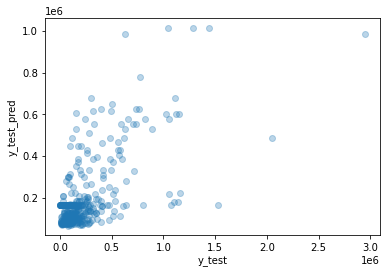

In [ ]:
plt.scatter(y_test, y_test_pred_p, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

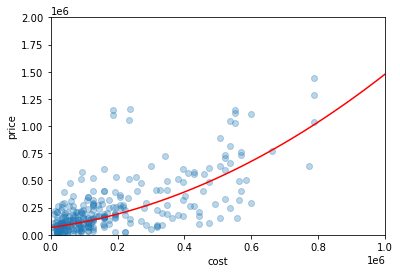

In [ ]:
plot_cost_price(test.cost, test.price, model_p)

<font color='red'>Question:</font> Does the model with polynomial features perform better? Why?

### Both the metrics and the plots show that the polynomial model performs better. Polynomial regression is a great way to add more flexibility in the fitting without involving more features.

##### your model is only as good as your data

1.   List item
2.   List item



**Example:** Extract the linear model from pipeline

In [ ]:
lr = model_p.steps[1][1]

**Example:** Extract the coefficents

In [ ]:
lr.coef_

array([0.00000000e+00, 4.20267056e-01, 9.92477321e-07])

<font color='red'>Question:</font> Why is the coefficient for x^2 so small?

### Becuase of the fast growth in magnitude from cost to cost squared, the coefficient for cost squared has to be small, otherwise the fitting will be completely dominated by the cost squared term.

##### y = a1 * x and y = a2 * x^2, when x and y are given, a2 will be smaller than a1
##### don't get confused with feature importance

## 3.3 Rescaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
steps_s = [('poly', PolynomialFeatures(degree=2)),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]
model_s = Pipeline(steps_s)

In [ ]:
model_s.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('Rescale', MinMaxScaler()),
                ('lr', LinearRegression())])

In [ ]:
model_s.steps[2][1].coef_

array([     0.        , 395891.5670774 , 886298.12766067])

<font color='red'>Question:</font> What does **MinMaxScaler** do? Why do we need it?

### It transforms features by scaling each feature to the given range on the training set. Becuase of the small coefficient for the cost squared term issue mentioned above, we need to transform the features so that they are on the same scale. As we can see from the new coefficients, the issue is solved.

##### not always necessary

## 3.4 High degree polynomial terms

<font color='red'>Assignment:</font> Repeat the steps in **4.2** with higher **degree** values in **PolynomialFeatures**.

##### question not clearly stated ~

In [ ]:
MAE_train = []
MAE_test = []
for degree in range(2, 51):
    steps_h = [('poly', PolynomialFeatures(degree = degree)),
               ('Rescale', MinMaxScaler()),
               ('lr', LinearRegression())]
    model_h = Pipeline(steps_h)
    model_h.fit(X_train, y_train)
    y_train_pred_h = model_h.predict(X_train)
    y_test_pred_h = model_h.predict(X_test)
    MAE_train.append(mean_absolute_error(y_train, y_train_pred_h))
    MAE_test.append(mean_absolute_error(y_test, y_test_pred_h))

<font color='red'>Assignment:</font> Visualize the change of train loss and test loss with polynomial degree value, respectively. Use **MAE**.

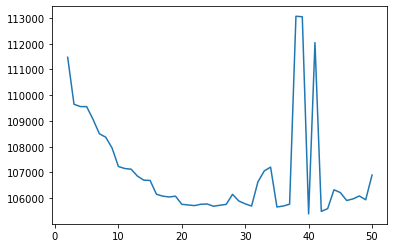

In [ ]:
plt.plot(np.linspace(2, 50, 49), MAE_train)

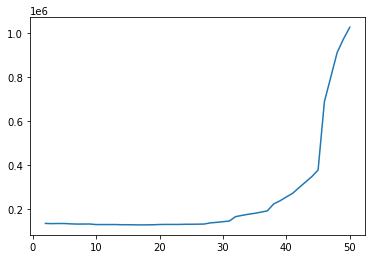

In [ ]:
plt.plot(np.linspace(2, 50, 49), MAE_test)

<font color='red'>Question:</font> Can we keep improving model with much higher degree polynomial terms?

### As we observe in the plots, the training error in general should go down (except for some spikes...), but the test error will go up after certain point, which is called overfitting.

<font color='red'>Question:</font> What is model complexity?

### In machine learning, model complexity often refers to the number of features included in a given predictive model. Overly complex models are less easily interpreted, at greater risk of overfitting, and will likely be more computationally expensive.

<font color='red'>Question:</font> What are overfitting and underfitting? Any examples of overfitting and underfitting above? How do you tell a model is overfit or underfit?

### An overfitted model is a model that contains more parameters than can be justified by the data. For example, the model picked up too much noise. On the other hand, underfitting occurs when a model cannot adequately capture the underlying structure of the data.
### In our case, the linear regression model is underfitted and the polynomial models with degree more than 30 are clearly overfitted. 
### We can plot the above training and test curves, in general, the corner where the training error curve slows down in decreasing and/or the corner where the test error curve starts to go up is a good guess.

<font color='red'>Question:</font> What is bias and variance? How do they relate to overfitting and underfitting?

### Bias means how far off our predictions are from real values. High bias can cause a model to miss the relevant relations between features and target (underfitting).
### Variance means change in predictions across different data sets. High variance can cause a model to capture the random noise in the training data, which will not be included in the test data (overfitting).

##### visualization: google image

<font color='red'>Question:</font> What is bias-variance tradeoff?

### In order to avoid overfitting and underfitting as much as possible, we consider a bias-variance tradeoff, represented by minimizing the Total Error:
$ Total Error(y_{pred}) = Bias(y_{pred})^{2} + Variance(y_{pred}) + Variance(y) $

<font color='red'>Assignment:</font> Search for approaches for preventing overfitting?

### To prevent overfitting, we can consider:
### (1) Reduce the number of features
### (2) Find more data
### (3) Use regularization: L1 (Lasso), L2 (Ridge)
### (4) Ensemble